# Sales 

The data was recorded for the period 1/2/2019 and 12/30/2020 with an aim to generate business insights to guide business direction

## Data Preprocessing

### EDA

In [1]:
# import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split as split
from sklearn.tree import DecisionTreeRegressor as DTR

In [2]:
# load dataset
sales = pd.read_csv("Sales-Export_2019-2020.csv")
sales.head(10)

,country,order_value_EUR,cost,date,category,customer_name,sales_manager,sales_rep,device_type,order_id
0,Sweden,"17,524.02",14122.61,2/12/2020,Books,Goldner-Dibbert,Maxie Marrow,Madelon Bront,Mobile,70-0511466
1,Finland,"116,563.40",92807.78,9/26/2019,Games,Hilll-Vandervort,Hube Corey,Wat Bowkley,Mobile,28-6585323
2,Portugal,"296,465.56",257480.34,7/11/2019,Clothing,Larkin-Collier,Celine Tumasian,Smitty Culverhouse,PC,58-7703341
3,Portugal,"74,532.02",59752.32,4/2/2020,Beauty,Hessel-Stiedemann,Celine Tumasian,Aurelie Wren,PC,14-6700183
4,Spain,"178,763.42",146621.76,12/22/2019,Games,Johns and Sons,Emalia Dinse,Bertha Walbrook,Tablet,15-8765160
5,Spain,"84,900.24",73701.90,7/14/2020,Clothing,"Farrell, Swaniawski and Crist",Emalia Dinse,Perri Aldersley,PC,60-6998932
6,Portugal,"71,620.08",62245.01,2/5/2019,Books,Schoen-Keeling,Celine Tumasian,Smitty Culverhouse,PC,69-6259390
7,UK,"156,585.22",126599.15,8/30/2020,Accessories,"Hermiston, Simonis and Wisoky",Jessamine Apark,Winny Agnolo,PC,64-5761908
8,Portugal,"78,461.13",63537.82,5/10/2020,Appliances,Hessel-Stiedemann,Celine Tumasian,Smitty Culverhouse,Mobile,91-4126746
9,France,"64,827.80",56043.63,1/20/2019,Appliances,Gislason-Stanton,Othello Bowes,Maighdiln Upcraft,PC,62-3312495


In [3]:
## see information about dataset
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   country            1000 non-null   object 
 1    order_value_EUR   1000 non-null   object 
 2    cost              1000 non-null   float64
 3   date               1000 non-null   object 
 4   category           1000 non-null   object 
 5   customer_name      1000 non-null   object 
 6   sales_manager      1000 non-null   object 
 7   sales_rep          1000 non-null   object 
 8   device_type        1000 non-null   object 
 9   order_id           1000 non-null   object 
dtypes: float64(1), object(9)
memory usage: 78.3+ KB


In [4]:
## see names of colunm
sales.columns

Index(['country', ' order_value_EUR ', ' cost ', 'date', 'category',
       'customer_name', 'sales_manager', 'sales_rep', 'device_type',
       'order_id'],
      dtype='object')

### Data Cleaning

In [5]:
sales = sales.rename(columns={' cost ': 'cost',' order_value_EUR ':'sale'})

In [6]:
## see missing values in dataset
sales.isnull().sum()

country          0
sale             0
cost             0
date             0
category         0
customer_name    0
sales_manager    0
sales_rep        0
device_type      0
order_id         0
dtype: int64

In [7]:
## remove useless colunm
sales = sales.drop(["order_id","customer_name","sales_rep"],axis=1)

In [8]:
## edit date yo Data-Time Series
sales.date = pd.to_datetime(sales.date)

In [9]:
# edit order_value_EUR to float values
sales['sale']=sales['sale'].str.replace(',','')
sales['sale'] = sales['sale'].astype(float)

In [10]:
## dtypes after cleanning of data
sales.dtypes

country                  object
sale                    float64
cost                    float64
date             datetime64[ns]
category                 object
sales_manager            object
device_type              object
dtype: object

In [11]:
#totale sales
total_sales=sales["sale"].sum()
total_sales.round()

113361739.0

In [12]:
#totale cost
total_cost=sales["cost"].sum()
total_cost.round()

94369311.0

In [13]:
#total_profit
total_profit= total_sales - total_cost
total_profit.round()

18992428.0

In [14]:
#sales margin
sales_margin = ((total_sales - total_cost) / total_sales ) * 100
sales_margin

16.75382535247283

In [15]:
sales['profit'] = sales['sale'] - sales['cost']

In [16]:
## see status 
sales.describe().T

,count,mean,std,min,25%,50%,75%,max
sale,1000.0,113361.73871,61775.335675,15100.57,65310.8625,105419.425,151192.6425,383996.76
cost,1000.0,94369.31099,51540.020934,12113.68,54247.9575,87094.760,125570.8375,304701.43
profit,1000.0,18992.42772,10917.650434,2073.61,10746.4025,17331.830,25205.3250,79295.33


## Data Visualization

### Category

In [17]:
test=sales[['category','sale','cost','profit']]


#### Sales by Category

In [18]:
sales_by_category=test.groupby(["category"])["sale"].sum()
sales_by_category=sales_by_category.sort_values()
sales_by_category.round()

category
Other           3262983.0
Accessories     4703931.0
Outdoors        5939075.0
Smartphones    11101655.0
Beauty         12569064.0
Books          13179979.0
Electronics    14482078.0
Appliances     15139669.0
Games          15321623.0
Clothing       17661682.0
Name: sale, dtype: float64

Text(0, 0.5, 'Sales in Millions')

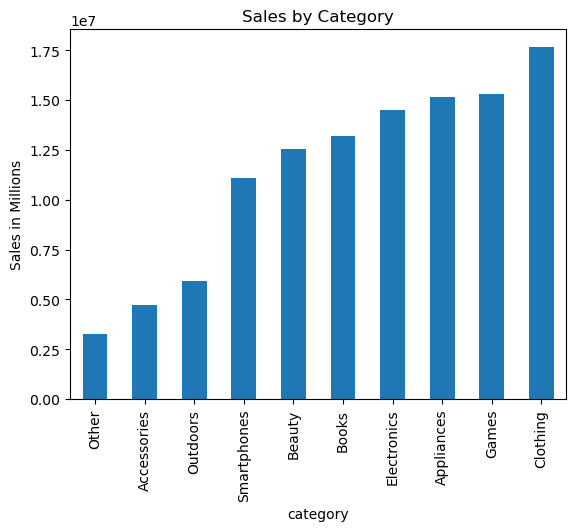

In [19]:
sales_by_category.plot(kind="bar")
plt.rcParams['figure.figsize'] = [8, 4]
plt.title("Sales by Category")
plt.ylabel("Sales in Millions")

#### Costs by Category

In [20]:
costs_by_category=test.groupby(["category"])["cost"].sum()
costs_by_category=costs_by_category.sort_values()
costs_by_category.round()

category
Other           2713949.0
Accessories     3920034.0
Outdoors        4882313.0
Smartphones     9281007.0
Beauty         10450636.0
Books          10954065.0
Electronics    12080945.0
Appliances     12604789.0
Games          12761828.0
Clothing       14719744.0
Name: cost, dtype: float64

Text(0, 0.5, 'Costs in Millions')

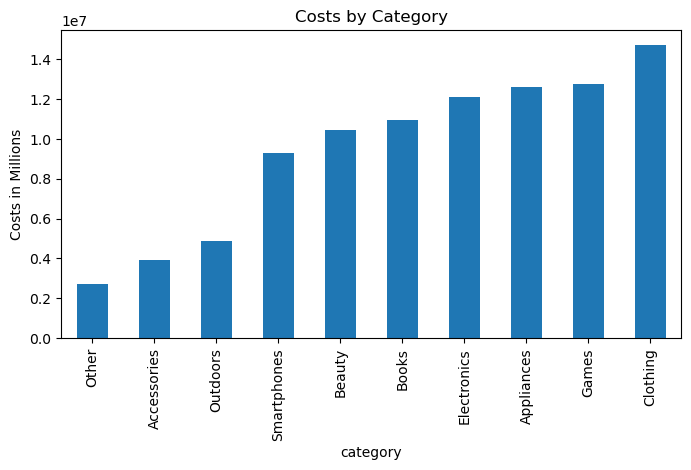

In [21]:
costs_by_category.plot(kind="bar")
plt.rcParams['figure.figsize'] = [8, 4]
plt.title("Costs by Category")
plt.ylabel("Costs in Millions")

#### Profits by Category

In [22]:
profits_by_category=test.groupby(["category"])["profit"].sum()
profits_by_category=costs_by_category.sort_values()
profits_by_category.round()

category
Other           2713949.0
Accessories     3920034.0
Outdoors        4882313.0
Smartphones     9281007.0
Beauty         10450636.0
Books          10954065.0
Electronics    12080945.0
Appliances     12604789.0
Games          12761828.0
Clothing       14719744.0
Name: cost, dtype: float64

Text(0, 0.5, 'Profit in Millions')

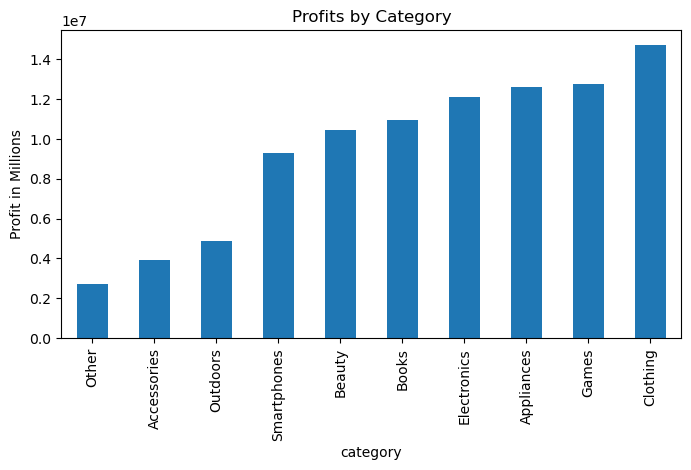

In [23]:
profits_by_category.plot(kind="bar")
plt.rcParams['figure.figsize'] = [8, 4]
plt.title("Profits by Category")
plt.ylabel("Profit in Millions")

### Country

In [24]:
test = sales[['country','sale','cost','profit']]

#### Sales by Country

In [25]:
sales_by_country = test.groupby(["country"])["sale"].sum()
sales_by_country  = sales_by_country.sort_values()
sales_by_country.round()                                  

country
Austria          190166.0
Belgium          608970.0
Denmark          763204.0
Italy            935569.0
Spain           2499240.0
Germany         2794049.0
Luxembourg      2913550.0
Netherlands     3224665.0
Bulgaria        3482145.0
Ireland         4952285.0
Finland         5548035.0
UK             12115617.0
Sweden         19637204.0
France         25900678.0
Portugal       27796362.0
Name: sale, dtype: float64

Text(0, 0.5, 'Sales in Millions')

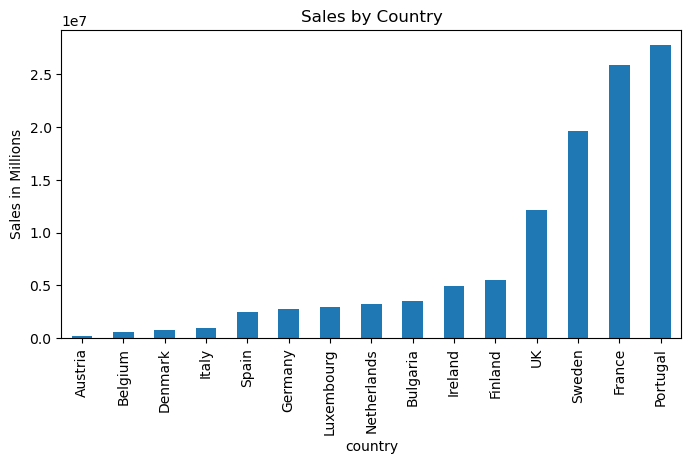

In [26]:
sales_by_country.plot(kind="bar")
plt.rcParams['figure.figsize'] = [8, 4]
plt.title("Sales by Country")
plt.ylabel("Sales in Millions")

#### Costs by Country

In [27]:
costs_by_country = test.groupby(["country"])["cost"].sum()
costs_by_country = costs_by_country.sort_values()
costs_by_country.round()


country
Austria          154448.0
Belgium          514537.0
Denmark          629851.0
Italy            780111.0
Spain           2084550.0
Germany         2328090.0
Luxembourg      2430984.0
Netherlands     2699099.0
Bulgaria        2876742.0
Ireland         4122973.0
Finland         4648750.0
UK             10063563.0
Sweden         16343687.0
France         21565674.0
Portugal       23126254.0
Name: cost, dtype: float64

Text(0, 0.5, 'Costs in Millions')

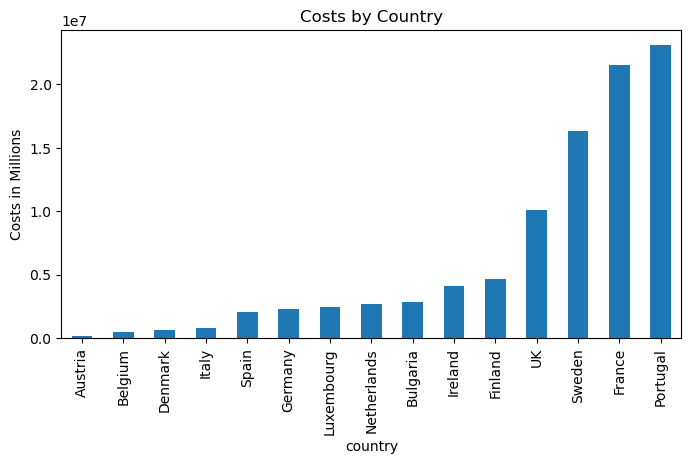

In [28]:
costs_by_country.plot(kind="bar")
plt.rcParams['figure.figsize'] = [8, 4]
plt.title("Costs by Country")
plt.ylabel("Costs in Millions")

#### Profits by Country

In [29]:

profits_by_country = test.groupby(["country"])["profit"].sum()
profits_by_country = profits_by_country.sort_values()
profits_by_country.round()

country
Austria          35718.0
Belgium          94433.0
Denmark         133353.0
Italy           155459.0
Spain           414690.0
Germany         465958.0
Luxembourg      482566.0
Netherlands     525566.0
Bulgaria        605403.0
Ireland         829312.0
Finland         899285.0
UK             2052054.0
Sweden         3293517.0
France         4335005.0
Portugal       4670108.0
Name: profit, dtype: float64

Text(0, 0.5, 'profits in Millions')

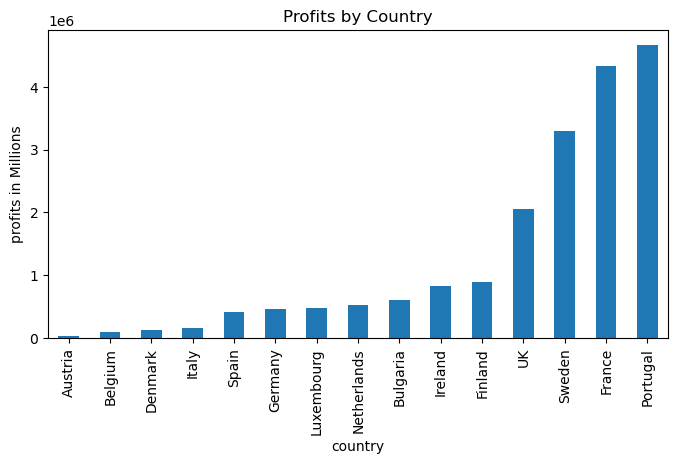

In [30]:
profits_by_country.plot(kind="bar")
plt.rcParams['figure.figsize'] = [8, 4]
plt.title("Profits by Country")
plt.ylabel("profits in Millions")

### Device

In [31]:
test = sales[['device_type','sale','cost','profit']]

#### Sales by Device

In [32]:
sales_by_device = test.groupby(["device_type"])["sale"].sum()
sales_by_device = sales_by_device.sort_values()
sales_by_device.round()

device_type
Tablet     8267061.0
Mobile    15447394.0
PC        89647284.0
Name: sale, dtype: float64

Text(0, 0.5, 'Sales in Millions')

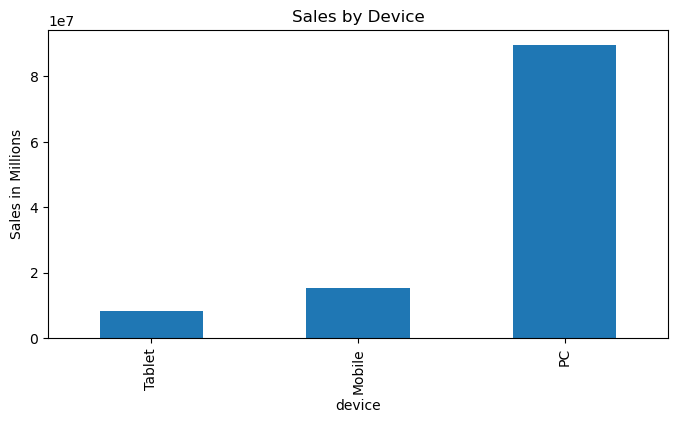

In [33]:
sales_by_device.plot(kind="bar")
plt.rcParams['figure.figsize'] = [4, 2]
plt.title("Sales by Device")
plt.xlabel("device")
plt.ylabel("Sales in Millions")

#### Sales by Device

In [34]:
costs_by_device = test.groupby(["device_type"])["cost"].sum()
costs_by_device = costs_by_device.sort_values()
costs_by_device.round()

device_type
Tablet     6915645.0
Mobile    12894680.0
PC        74558986.0
Name: cost, dtype: float64

Text(0, 0.5, 'Costs in Millions')

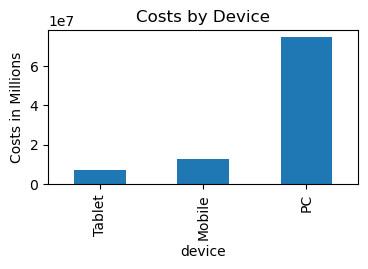

In [35]:
costs_by_device.plot(kind="bar")
plt.rcParams['figure.figsize'] = [4, 2]
plt.title("Costs by Device")
plt.xlabel("device")
plt.ylabel("Costs in Millions")

#### Profits by Device

In [36]:
profits_by_device = test.groupby(["device_type"])["profit"].sum()
profits_by_device = costs_by_device.sort_values()
profits_by_device.round()

device_type
Tablet     6915645.0
Mobile    12894680.0
PC        74558986.0
Name: cost, dtype: float64

Text(0, 0.5, 'Profits in Millions')

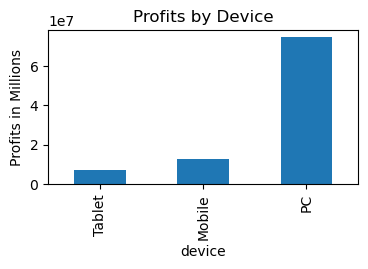

In [37]:
profits_by_device.plot(kind="bar")
plt.rcParams['figure.figsize'] = [4, 2]
plt.title("Profits by Device")
plt.xlabel("device")
plt.ylabel("Profits in Millions")

### Sales Manager

In [38]:
test = sales[['sales_manager','sale','cost','profit']]

#### Sales by Sales Manager

In [39]:
sales_by_manger = test.groupby(["sales_manager"])["sale"].sum()
sales_by_manger = sales_by_manger.sort_values()
sales_by_manger.round()

sales_manager
Orsa Geekin           190166.0
Lambert Norheny       608970.0
Modestia Byfford      763204.0
Piggy Roscrigg        935569.0
Emalia Dinse         2499240.0
Rickard Doogood      2794049.0
Ilsa Kob             2913550.0
Denice Amberg        3224665.0
Charil Alpe          3482145.0
Glenine Suttaby      4952285.0
Hube Corey           5548035.0
Jessamine Apark     12115617.0
Maxie Marrow        19637204.0
Othello Bowes       25900678.0
Celine Tumasian     27796362.0
Name: sale, dtype: float64

Text(0, 0.5, 'Sales in Millions')

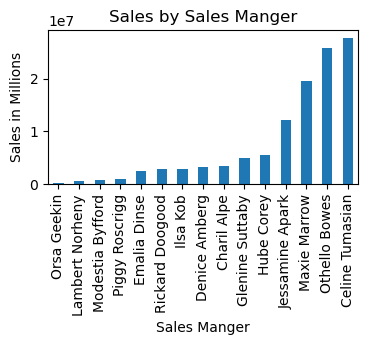

In [40]:
sales_by_manger.plot(kind="bar")
plt.rcParams['figure.figsize'] = [8, 4]
plt.title("Sales by Sales Manger")
plt.xlabel("Sales Manger")
plt.ylabel("Sales in Millions")

#### Costs by Sales Manager

In [41]:
costs_by_manger = test.groupby(["sales_manager"])["cost"].sum()
costs_by_manger = costs_by_manger.sort_values()
costs_by_manger.round()

sales_manager
Orsa Geekin           154448.0
Lambert Norheny       514537.0
Modestia Byfford      629851.0
Piggy Roscrigg        780111.0
Emalia Dinse         2084550.0
Rickard Doogood      2328090.0
Ilsa Kob             2430984.0
Denice Amberg        2699099.0
Charil Alpe          2876742.0
Glenine Suttaby      4122973.0
Hube Corey           4648750.0
Jessamine Apark     10063563.0
Maxie Marrow        16343687.0
Othello Bowes       21565674.0
Celine Tumasian     23126254.0
Name: cost, dtype: float64

Text(0, 0.5, 'Costs in Millions')

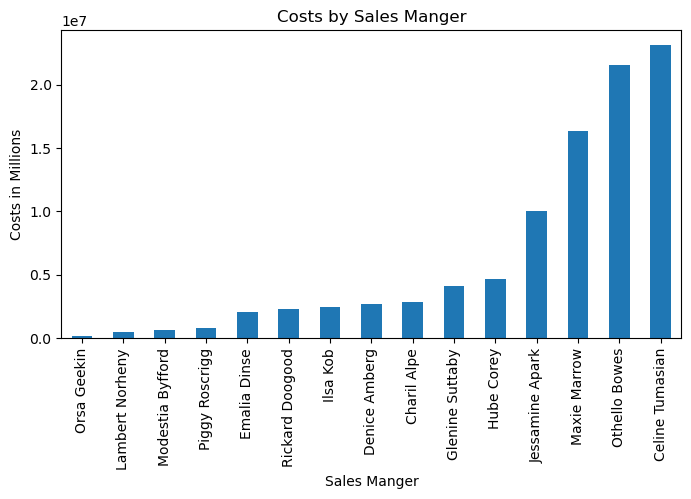

In [42]:
costs_by_manger.plot(kind="bar")
plt.rcParams['figure.figsize'] = [8, 4]
plt.title("Costs by Sales Manger")
plt.xlabel("Sales Manger")
plt.ylabel("Costs in Millions")

#### Profits by Sales Manager

In [43]:
profits_by_manger = test.groupby(["sales_manager"])["profit"].sum()
profits_by_manger = profits_by_manger.sort_values()
profits_by_manger.round()

sales_manager
Orsa Geekin           35718.0
Lambert Norheny       94433.0
Modestia Byfford     133353.0
Piggy Roscrigg       155459.0
Emalia Dinse         414690.0
Rickard Doogood      465958.0
Ilsa Kob             482566.0
Denice Amberg        525566.0
Charil Alpe          605403.0
Glenine Suttaby      829312.0
Hube Corey           899285.0
Jessamine Apark     2052054.0
Maxie Marrow        3293517.0
Othello Bowes       4335005.0
Celine Tumasian     4670108.0
Name: profit, dtype: float64

Text(0, 0.5, 'Profits in Millions')

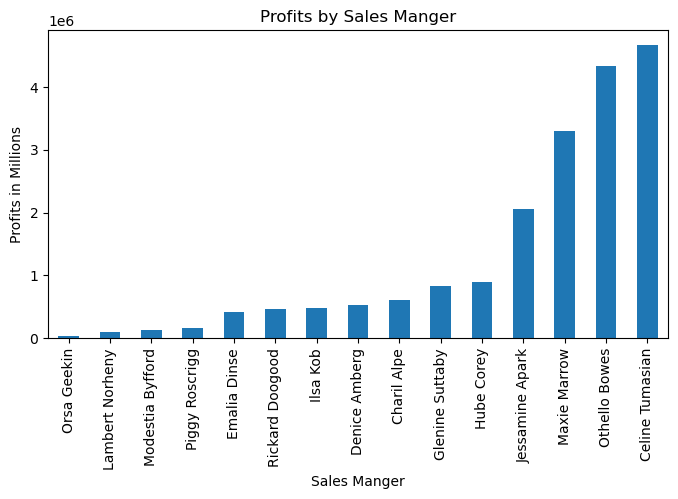

In [44]:
profits_by_manger.plot(kind="bar")
plt.rcParams['figure.figsize'] = [8, 4]
plt.title("Profits by Sales Manger")
plt.xlabel("Sales Manger")
plt.ylabel("Profits in Millions")

### Year

In [45]:
sales['year'] = sales.date.dt.year
sales['month'] = sales.date.dt.month
sales

,country,sale,cost,date,category,sales_manager,device_type,profit,year,month
0,Sweden,17524.02,14122.61,2020-02-12,Books,Maxie Marrow,Mobile,3401.41,2020,2
1,Finland,116563.40,92807.78,2019-09-26,Games,Hube Corey,Mobile,23755.62,2019,9
2,Portugal,296465.56,257480.34,2019-07-11,Clothing,Celine Tumasian,PC,38985.22,2019,7
3,Portugal,74532.02,59752.32,2020-04-02,Beauty,Celine Tumasian,PC,14779.70,2020,4
4,Spain,178763.42,146621.76,2019-12-22,Games,Emalia Dinse,Tablet,32141.66,2019,12
...,...,...,...,...,...,...,...,...,...,...
995,France,46296.26,40319.41,2020-05-15,Games,Othello Bowes,Tablet,5976.85,2020,5
996,Belgium,118061.05,101131.10,2020-07-02,Appliances,Lambert Norheny,Mobile,16929.95,2020,7
997,Finland,74480.56,60023.88,2020-03-06,Clothing,Hube Corey,PC,14456.68,2020,3
998,Spain,87205.01,69171.01,2020-06-18,Games,Emalia Dinse,Tablet,18034.00,2020,6


#### Sales

Text(0.5, 1.0, 'Sales in year')

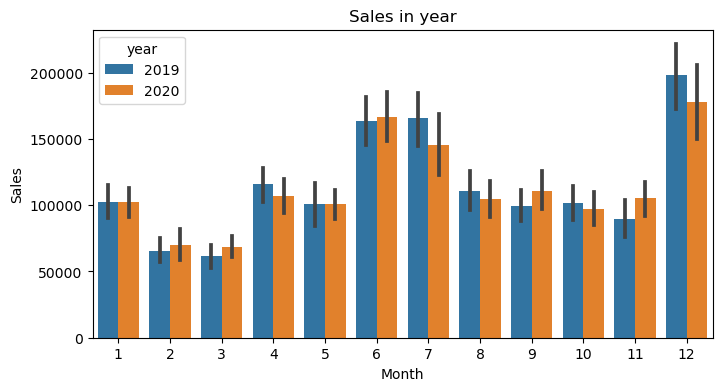

In [46]:
sns.barplot(sales,x='month',y='sale',hue='year')
plt.xlabel("Month")
plt.ylabel("Sales")
plt.title("Sales in year")

#### Costs

Text(0.5, 1.0, 'Costs in year')

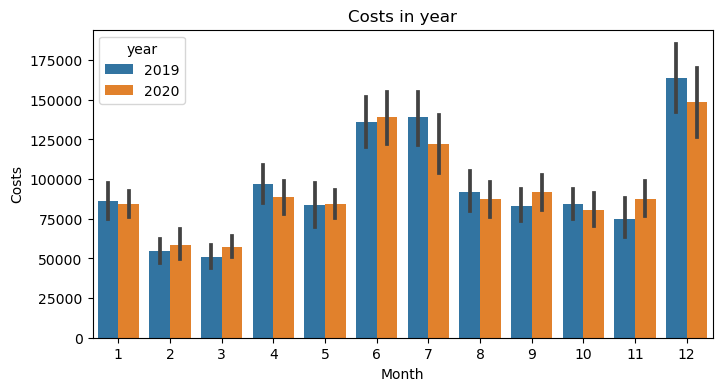

In [47]:
sns.barplot(sales,x='month',y='cost',hue='year')
plt.xlabel("Month")
plt.ylabel("Costs")
plt.title("Costs in year")

#### Profits

Text(0.5, 1.0, 'Profits in year')

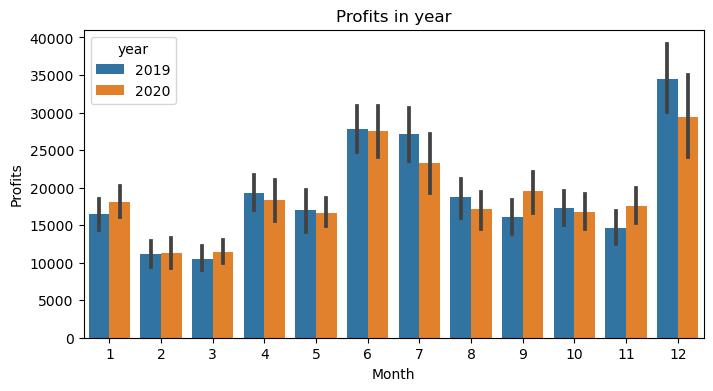

In [48]:
sns.barplot(sales,x='month',y='profit',hue='year')
plt.xlabel("Month")
plt.ylabel("Profits")
plt.title("Profits in year")

In [49]:
# drop unuseful columns
sales.drop(['country','date', 'sales_manager','year', 'month'],axis=1,inplace=True)

In [50]:
# convert device type 
def device(i):
    if i == 'PC':
        return 0
    elif i == 'Mobile':
        return 1 
    else :
        return 2 

In [51]:
sales['device_type'] = sales['device_type'].apply(device)

In [52]:
# convert category
def category(i):
    if i == 'Clothing':
        return 1
    elif i == 'Games':
        return 2
    elif i == 'Electronics':
        return 3
    elif i == 'Appliances':
        return 4
    elif i == 'Books':
        return 5
    elif i == 'Beauty':
        return 6
    elif i == 'Smartphones':
        return 7
    elif i == 'Outdoors':
        return 8
    elif i == 'Accessories':
        return 9
    else:
        return 0
    

In [53]:
sales['category'] = sales['category'].apply(category)

## Data spliting

In [54]:
y = sales['sale'] 
x = sales.drop('sale',axis=1)

In [55]:
x_train,x_test,y_train,y_test = split(x,y,test_size=0.25,random_state=44)

## Machine Learning Algorithm

### Decision Tree

In [56]:
Regressor = DTR()

In [57]:
Regressor.fit(x_train,y_train)

DecisionTreeRegressor()

In [58]:
score = Regressor.score(x_train,y_train)
print('Train Accuracy',score*100,sep=' : ')

Train Accuracy : 100.0


In [59]:
score = Regressor.score(x_test,y_test)
print('Test Accuracy',score*100,sep=' : ')

Test Accuracy : 99.83085197359874
